In [10]:
import numpy as np
np.int = np.int32
np.float = np.float64
np.bool = np.bool_
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = {
    "Month": ["January", "February", "March", "April", "May", "June"],
    "Americas": [11725442, 12242370, 14389954, 12525457, 14786593, 17012422],
    "Europe": [4211671, 4211986, 4549024, 4020870, 4085829, 4426970],
    "Japan": [3392699, 3553205, 3736395, 3599206, 3789036, 3938601],
    "Asia Pacific": [24801393, 24732099, 29278172, 24470280, 28120905, 29151522],
}

In [15]:
df = pd.DataFrame(data)

In [16]:
df

,Month,Americas,Europe,Japan,Asia Pacific
0,January,11725442,4211671,3392699,24801393
1,February,12242370,4211986,3553205,24732099
2,March,14389954,4549024,3736395,29278172
3,April,12525457,4020870,3599206,24470280
4,May,14786593,4085829,3789036,28120905
5,June,17012422,4426970,3938601,29151522


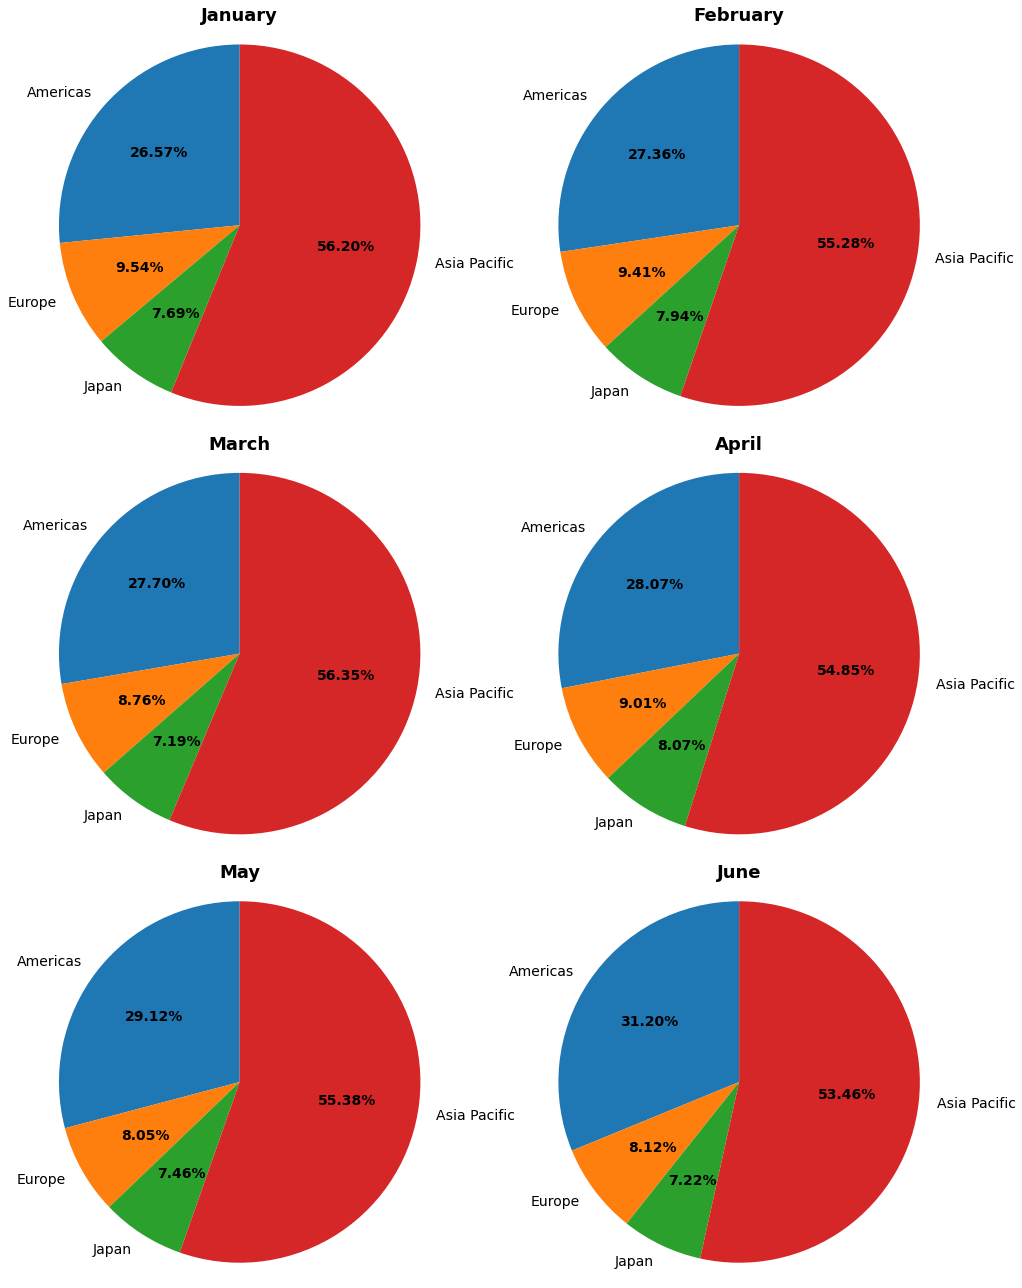

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()

for i, month in enumerate(df["Month"]):
    wedges, texts, autotexts = axes[i].pie(
        df.iloc[i, 1:], 
        labels=df.columns[1:], 
        autopct=lambda p: f'{p:.2f}%', 
        startangle=90, 
        textprops={'fontsize': 14}  
    )
    axes[i].set_title(f"{month}", fontdict={'fontsize': 18, 'fontweight': 'bold'})
    
    for autotext in autotexts:
        autotext.set_fontsize(14)
        autotext.set_fontweight('bold')
    axes[i].axis('equal')  

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [24]:
df.sum()

Month           JanuaryFebruaryMarchAprilMayJune
Americas                                82682238
Europe                                  25506350
Japan                                   22009142
Asia Pacific                           160554371
dtype: object

### Line Charts.

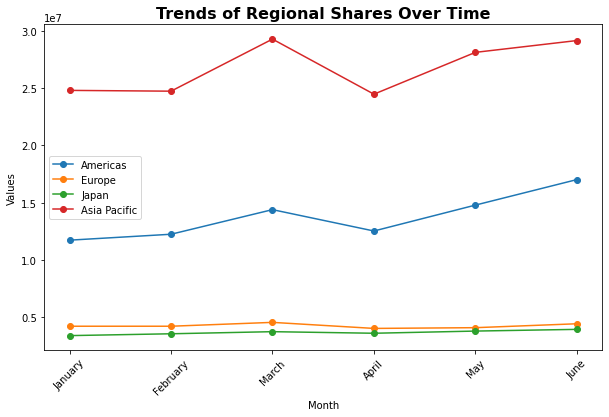

In [25]:
df.set_index('Month').plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Trends of Regional Shares Over Time", fontsize=16, fontweight='bold')
plt.ylabel('Values')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

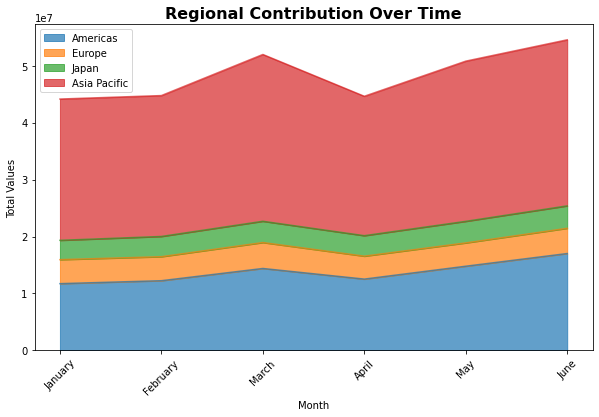

In [26]:
df.set_index('Month').plot(kind='area', stacked=True, figsize=(10, 6), alpha=0.7)
plt.title("Regional Contribution Over Time", fontsize=16, fontweight='bold')
plt.ylabel('Total Values')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

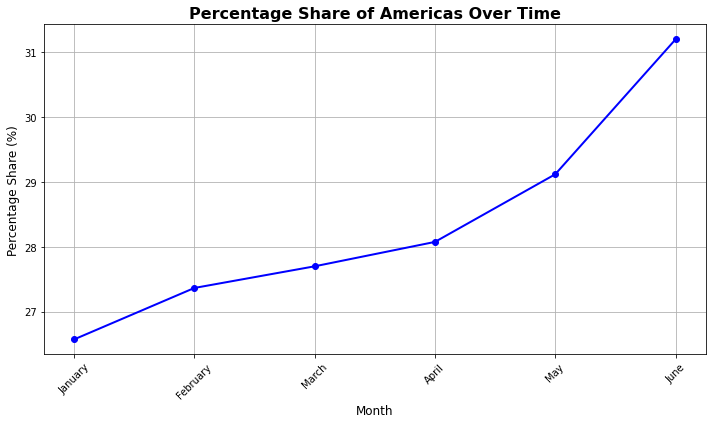

In [29]:
df["Total"] = df.iloc[:, 1:].sum(axis=1)
df["Americas Share (%)"] = (df["Americas"] / df["Total"]) * 100

plt.figure(figsize=(10, 6))
plt.plot(df["Month"], df["Americas Share (%)"], marker='o', linestyle='-', color='blue', linewidth=2)

plt.title("Percentage Share of Americas Over Time", fontsize=16, fontweight='bold')
plt.ylabel('Percentage Share (%)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()